# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

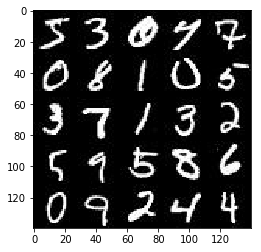

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

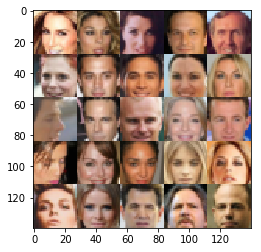

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


/Users/Yifan/anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [14]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name="input_z")
    learning_rate = tf.placeholder(tf.float32, name="learning_rate")

    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [15]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 32x32x3
        x1 = tf.layers.conv2d(images, 128, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        relu1 = tf.maximum(0.2 * x1, x1)
        # 16x16x32
        
        x2 = tf.layers.conv2d(relu1, 256, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(0.2 * bn2, bn2)
        # 8x8x128
        
        x3 = tf.layers.conv2d(relu2, 512, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(0.2 * bn3, bn3)
        # 4x4x256

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*512))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [16]:
def generator(z, output_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator',reuse = not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*512)
        
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(0.2 * x1, x1)
#         print ('Layer 1:', x1.shape)
        # 2x2x512 now
    
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(0.2 * x2, x2)
#         print ('Layer 2:', x2.shape)
        # 4x4x256 now
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(0.2 * x3, x3)
#         print ('Layer 3:', x3.shape)
        # 7x7x128 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, output_dim, 3, strides=1, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        # 32x32x3 now
        
        out = tf.tanh(logits)
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [17]:
def model_loss(input_real, input_z, output_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, output_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*0.9))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [18]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [19]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [20]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    _, image_width, image_height, image_channels = data_shape
    input_real, input_z, lr = model_inputs(image_width, image_height,image_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z,image_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images = batch_images * 2
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr:learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, lr:learning_rate})
                #_ = sess.run(g_opt, feed_dict={input_z: batch_z, lr:learning_rate})
                
                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, 50, input_z, image_channels, data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.2287... Generator Loss: 0.7211
Epoch 1/2... Discriminator Loss: 1.5442... Generator Loss: 0.8572
Epoch 1/2... Discriminator Loss: 1.2850... Generator Loss: 1.2031
Epoch 1/2... Discriminator Loss: 1.3977... Generator Loss: 0.7651
Epoch 1/2... Discriminator Loss: 1.6683... Generator Loss: 0.5406
Epoch 1/2... Discriminator Loss: 1.3079... Generator Loss: 1.3147
Epoch 1/2... Discriminator Loss: 1.6416... Generator Loss: 0.4360
Epoch 1/2... Discriminator Loss: 1.6112... Generator Loss: 1.2893
Epoch 1/2... Discriminator Loss: 1.2323... Generator Loss: 0.8260
Epoch 1/2... Discriminator Loss: 1.6588... Generator Loss: 0.4072


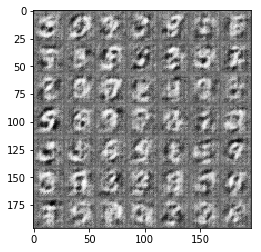

Epoch 1/2... Discriminator Loss: 1.2576... Generator Loss: 0.6155
Epoch 1/2... Discriminator Loss: 1.4513... Generator Loss: 0.5228
Epoch 1/2... Discriminator Loss: 1.0409... Generator Loss: 1.1855
Epoch 1/2... Discriminator Loss: 1.1801... Generator Loss: 0.8008
Epoch 1/2... Discriminator Loss: 1.4471... Generator Loss: 0.5123
Epoch 1/2... Discriminator Loss: 1.0576... Generator Loss: 1.6279
Epoch 1/2... Discriminator Loss: 1.3837... Generator Loss: 2.5856
Epoch 1/2... Discriminator Loss: 1.0241... Generator Loss: 1.2551
Epoch 1/2... Discriminator Loss: 1.2155... Generator Loss: 0.6447
Epoch 1/2... Discriminator Loss: 1.1489... Generator Loss: 2.4615


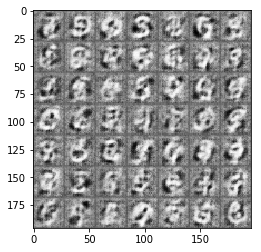

Epoch 1/2... Discriminator Loss: 0.8940... Generator Loss: 1.4605
Epoch 1/2... Discriminator Loss: 1.0966... Generator Loss: 0.8328
Epoch 1/2... Discriminator Loss: 1.1157... Generator Loss: 0.7163
Epoch 1/2... Discriminator Loss: 1.2609... Generator Loss: 0.6143
Epoch 1/2... Discriminator Loss: 0.6923... Generator Loss: 1.7154
Epoch 1/2... Discriminator Loss: 0.8642... Generator Loss: 1.2914
Epoch 1/2... Discriminator Loss: 0.8488... Generator Loss: 1.9114
Epoch 1/2... Discriminator Loss: 1.0574... Generator Loss: 0.8998
Epoch 1/2... Discriminator Loss: 0.9808... Generator Loss: 0.9267
Epoch 1/2... Discriminator Loss: 0.7761... Generator Loss: 1.7509


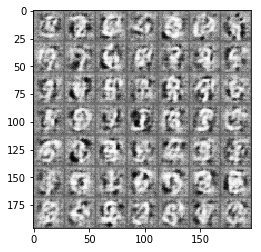

Epoch 1/2... Discriminator Loss: 0.7872... Generator Loss: 1.8414
Epoch 1/2... Discriminator Loss: 0.9674... Generator Loss: 2.2784
Epoch 1/2... Discriminator Loss: 0.7819... Generator Loss: 1.3506
Epoch 1/2... Discriminator Loss: 0.8549... Generator Loss: 1.2662
Epoch 1/2... Discriminator Loss: 0.6950... Generator Loss: 2.0926
Epoch 1/2... Discriminator Loss: 0.7633... Generator Loss: 2.3177
Epoch 1/2... Discriminator Loss: 0.7242... Generator Loss: 1.5307
Epoch 1/2... Discriminator Loss: 0.7363... Generator Loss: 1.3250
Epoch 1/2... Discriminator Loss: 1.0806... Generator Loss: 1.9720
Epoch 1/2... Discriminator Loss: 0.9350... Generator Loss: 0.9583


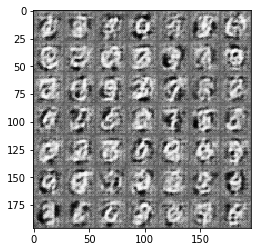

Epoch 1/2... Discriminator Loss: 0.7530... Generator Loss: 1.6494
Epoch 1/2... Discriminator Loss: 0.7570... Generator Loss: 1.6084
Epoch 1/2... Discriminator Loss: 1.9620... Generator Loss: 3.7621
Epoch 1/2... Discriminator Loss: 0.9050... Generator Loss: 1.2821
Epoch 1/2... Discriminator Loss: 0.6991... Generator Loss: 1.7197
Epoch 1/2... Discriminator Loss: 1.1463... Generator Loss: 0.7078
Epoch 1/2... Discriminator Loss: 0.9286... Generator Loss: 1.4646
Epoch 1/2... Discriminator Loss: 0.9085... Generator Loss: 1.2211
Epoch 1/2... Discriminator Loss: 1.0426... Generator Loss: 0.9186
Epoch 1/2... Discriminator Loss: 0.9533... Generator Loss: 1.5409


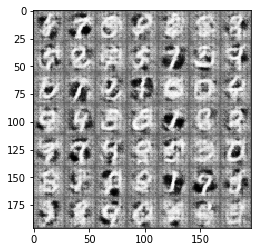

Epoch 1/2... Discriminator Loss: 1.1950... Generator Loss: 1.7347
Epoch 1/2... Discriminator Loss: 1.2268... Generator Loss: 0.6835
Epoch 1/2... Discriminator Loss: 1.0851... Generator Loss: 2.0693
Epoch 1/2... Discriminator Loss: 0.9678... Generator Loss: 1.0252
Epoch 1/2... Discriminator Loss: 1.1484... Generator Loss: 0.7478
Epoch 1/2... Discriminator Loss: 1.2179... Generator Loss: 0.6886
Epoch 1/2... Discriminator Loss: 1.3247... Generator Loss: 0.6041
Epoch 1/2... Discriminator Loss: 0.9731... Generator Loss: 0.9895
Epoch 1/2... Discriminator Loss: 1.4554... Generator Loss: 0.4830
Epoch 1/2... Discriminator Loss: 1.0532... Generator Loss: 1.2012


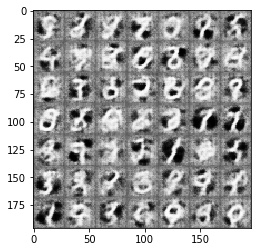

Epoch 1/2... Discriminator Loss: 0.9687... Generator Loss: 1.0908
Epoch 1/2... Discriminator Loss: 0.9574... Generator Loss: 1.1807
Epoch 1/2... Discriminator Loss: 1.3558... Generator Loss: 0.5189
Epoch 1/2... Discriminator Loss: 0.8868... Generator Loss: 1.1259
Epoch 1/2... Discriminator Loss: 1.3151... Generator Loss: 0.5413
Epoch 1/2... Discriminator Loss: 1.1852... Generator Loss: 1.7769
Epoch 1/2... Discriminator Loss: 0.9723... Generator Loss: 1.1016
Epoch 1/2... Discriminator Loss: 1.3594... Generator Loss: 0.6140
Epoch 1/2... Discriminator Loss: 1.1060... Generator Loss: 0.8034
Epoch 1/2... Discriminator Loss: 0.9714... Generator Loss: 1.2221


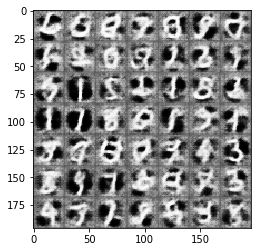

Epoch 1/2... Discriminator Loss: 1.1444... Generator Loss: 0.8890
Epoch 1/2... Discriminator Loss: 0.9922... Generator Loss: 1.2542
Epoch 1/2... Discriminator Loss: 1.0606... Generator Loss: 1.8477
Epoch 1/2... Discriminator Loss: 0.9626... Generator Loss: 1.1155
Epoch 1/2... Discriminator Loss: 0.9668... Generator Loss: 1.5095
Epoch 1/2... Discriminator Loss: 0.9438... Generator Loss: 1.2796
Epoch 1/2... Discriminator Loss: 0.9700... Generator Loss: 1.6665
Epoch 1/2... Discriminator Loss: 1.4194... Generator Loss: 0.5716
Epoch 1/2... Discriminator Loss: 1.0309... Generator Loss: 1.6335
Epoch 1/2... Discriminator Loss: 1.0962... Generator Loss: 0.7812


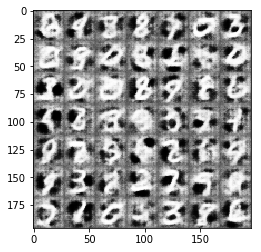

Epoch 1/2... Discriminator Loss: 0.9282... Generator Loss: 1.1009
Epoch 1/2... Discriminator Loss: 0.9727... Generator Loss: 1.4118
Epoch 1/2... Discriminator Loss: 1.1027... Generator Loss: 1.7535
Epoch 1/2... Discriminator Loss: 0.8091... Generator Loss: 1.4161
Epoch 1/2... Discriminator Loss: 0.9176... Generator Loss: 1.1652
Epoch 1/2... Discriminator Loss: 1.5276... Generator Loss: 0.7859
Epoch 1/2... Discriminator Loss: 1.3663... Generator Loss: 1.6600
Epoch 1/2... Discriminator Loss: 0.9329... Generator Loss: 1.0709
Epoch 1/2... Discriminator Loss: 0.9270... Generator Loss: 1.3656
Epoch 1/2... Discriminator Loss: 1.0073... Generator Loss: 0.9567


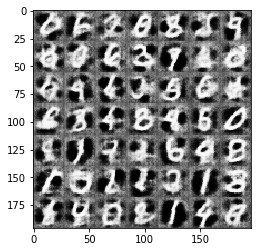

Epoch 1/2... Discriminator Loss: 0.9920... Generator Loss: 1.1049
Epoch 1/2... Discriminator Loss: 0.8512... Generator Loss: 1.6915
Epoch 1/2... Discriminator Loss: 1.0965... Generator Loss: 0.8869
Epoch 2/2... Discriminator Loss: 1.0516... Generator Loss: 0.9946
Epoch 2/2... Discriminator Loss: 0.8479... Generator Loss: 1.3016
Epoch 2/2... Discriminator Loss: 0.9614... Generator Loss: 1.2258
Epoch 2/2... Discriminator Loss: 1.1886... Generator Loss: 0.7108
Epoch 2/2... Discriminator Loss: 1.4418... Generator Loss: 0.4899
Epoch 2/2... Discriminator Loss: 0.9876... Generator Loss: 1.0762
Epoch 2/2... Discriminator Loss: 1.0692... Generator Loss: 1.4826


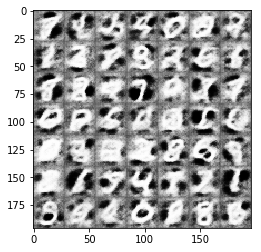

Epoch 2/2... Discriminator Loss: 1.0262... Generator Loss: 1.1238
Epoch 2/2... Discriminator Loss: 0.8911... Generator Loss: 1.4283
Epoch 2/2... Discriminator Loss: 0.8515... Generator Loss: 1.1114
Epoch 2/2... Discriminator Loss: 1.0129... Generator Loss: 1.1532
Epoch 2/2... Discriminator Loss: 0.8892... Generator Loss: 1.3486
Epoch 2/2... Discriminator Loss: 1.0689... Generator Loss: 0.8382
Epoch 2/2... Discriminator Loss: 1.1797... Generator Loss: 0.7265
Epoch 2/2... Discriminator Loss: 1.1459... Generator Loss: 0.8187
Epoch 2/2... Discriminator Loss: 0.9626... Generator Loss: 1.4186
Epoch 2/2... Discriminator Loss: 1.2741... Generator Loss: 0.5804


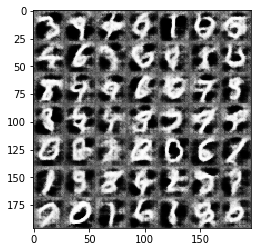

Epoch 2/2... Discriminator Loss: 0.8465... Generator Loss: 1.6192
Epoch 2/2... Discriminator Loss: 0.7918... Generator Loss: 1.7045
Epoch 2/2... Discriminator Loss: 0.8073... Generator Loss: 1.4226
Epoch 2/2... Discriminator Loss: 0.9480... Generator Loss: 1.1587
Epoch 2/2... Discriminator Loss: 0.9755... Generator Loss: 1.1055
Epoch 2/2... Discriminator Loss: 0.9537... Generator Loss: 1.0082
Epoch 2/2... Discriminator Loss: 0.9562... Generator Loss: 1.3892
Epoch 2/2... Discriminator Loss: 1.1203... Generator Loss: 0.7553
Epoch 2/2... Discriminator Loss: 1.3588... Generator Loss: 0.5809
Epoch 2/2... Discriminator Loss: 0.8399... Generator Loss: 1.1345


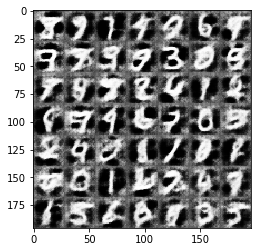

Epoch 2/2... Discriminator Loss: 0.8109... Generator Loss: 1.3527
Epoch 2/2... Discriminator Loss: 0.9384... Generator Loss: 1.3579
Epoch 2/2... Discriminator Loss: 1.1940... Generator Loss: 0.7525
Epoch 2/2... Discriminator Loss: 1.0225... Generator Loss: 0.9730
Epoch 2/2... Discriminator Loss: 1.2641... Generator Loss: 2.8289
Epoch 2/2... Discriminator Loss: 1.1997... Generator Loss: 0.6886
Epoch 2/2... Discriminator Loss: 1.2402... Generator Loss: 0.6434
Epoch 2/2... Discriminator Loss: 1.4220... Generator Loss: 0.5111
Epoch 2/2... Discriminator Loss: 0.9722... Generator Loss: 1.9892
Epoch 2/2... Discriminator Loss: 1.2914... Generator Loss: 1.8723


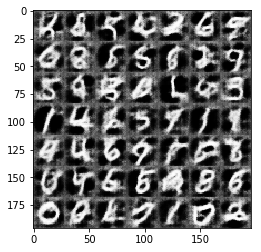

Epoch 2/2... Discriminator Loss: 0.9521... Generator Loss: 1.8582
Epoch 2/2... Discriminator Loss: 1.4426... Generator Loss: 2.2540
Epoch 2/2... Discriminator Loss: 0.9140... Generator Loss: 1.2985
Epoch 2/2... Discriminator Loss: 1.2278... Generator Loss: 0.6489
Epoch 2/2... Discriminator Loss: 1.4791... Generator Loss: 0.5327
Epoch 2/2... Discriminator Loss: 0.8730... Generator Loss: 1.5591
Epoch 2/2... Discriminator Loss: 0.9182... Generator Loss: 1.5523
Epoch 2/2... Discriminator Loss: 1.0878... Generator Loss: 0.7950
Epoch 2/2... Discriminator Loss: 1.0768... Generator Loss: 2.1798
Epoch 2/2... Discriminator Loss: 1.3720... Generator Loss: 2.5333


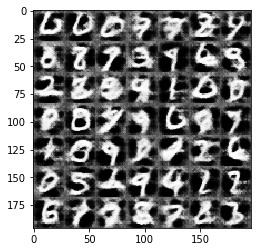

Epoch 2/2... Discriminator Loss: 1.4330... Generator Loss: 0.5835
Epoch 2/2... Discriminator Loss: 1.0152... Generator Loss: 1.6669
Epoch 2/2... Discriminator Loss: 0.9862... Generator Loss: 1.1393
Epoch 2/2... Discriminator Loss: 0.8171... Generator Loss: 1.8701
Epoch 2/2... Discriminator Loss: 0.9330... Generator Loss: 1.0469
Epoch 2/2... Discriminator Loss: 1.2267... Generator Loss: 0.6633
Epoch 2/2... Discriminator Loss: 0.8786... Generator Loss: 1.5080
Epoch 2/2... Discriminator Loss: 0.8536... Generator Loss: 1.5230
Epoch 2/2... Discriminator Loss: 1.1667... Generator Loss: 0.6754
Epoch 2/2... Discriminator Loss: 0.9168... Generator Loss: 1.2497


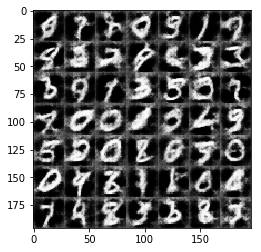

Epoch 2/2... Discriminator Loss: 1.1772... Generator Loss: 0.6936
Epoch 2/2... Discriminator Loss: 0.7963... Generator Loss: 1.5261
Epoch 2/2... Discriminator Loss: 0.8030... Generator Loss: 1.3587
Epoch 2/2... Discriminator Loss: 0.8068... Generator Loss: 1.2912
Epoch 2/2... Discriminator Loss: 0.7951... Generator Loss: 1.4769
Epoch 2/2... Discriminator Loss: 1.1129... Generator Loss: 2.1015
Epoch 2/2... Discriminator Loss: 0.9218... Generator Loss: 1.1439
Epoch 2/2... Discriminator Loss: 1.0036... Generator Loss: 0.9170
Epoch 2/2... Discriminator Loss: 1.0292... Generator Loss: 1.0159
Epoch 2/2... Discriminator Loss: 0.9407... Generator Loss: 1.1074


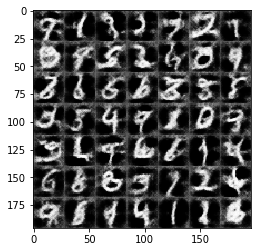

Epoch 2/2... Discriminator Loss: 1.0491... Generator Loss: 0.8527
Epoch 2/2... Discriminator Loss: 0.7818... Generator Loss: 1.6448
Epoch 2/2... Discriminator Loss: 1.4712... Generator Loss: 0.5122
Epoch 2/2... Discriminator Loss: 0.8849... Generator Loss: 1.1236
Epoch 2/2... Discriminator Loss: 0.9808... Generator Loss: 0.9096
Epoch 2/2... Discriminator Loss: 0.9937... Generator Loss: 0.9691
Epoch 2/2... Discriminator Loss: 0.8012... Generator Loss: 1.4079
Epoch 2/2... Discriminator Loss: 0.8483... Generator Loss: 1.9710
Epoch 2/2... Discriminator Loss: 0.8980... Generator Loss: 1.2877
Epoch 2/2... Discriminator Loss: 1.1194... Generator Loss: 0.7203


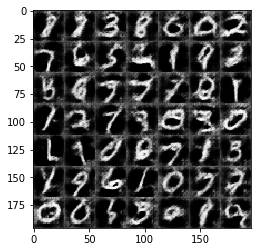

Epoch 2/2... Discriminator Loss: 0.9898... Generator Loss: 0.9453
Epoch 2/2... Discriminator Loss: 1.0635... Generator Loss: 1.8639
Epoch 2/2... Discriminator Loss: 0.9749... Generator Loss: 0.9422
Epoch 2/2... Discriminator Loss: 1.2139... Generator Loss: 2.8087
Epoch 2/2... Discriminator Loss: 0.8765... Generator Loss: 1.8020
Epoch 2/2... Discriminator Loss: 0.9037... Generator Loss: 1.4793
Epoch 2/2... Discriminator Loss: 0.7603... Generator Loss: 1.5908
Epoch 2/2... Discriminator Loss: 1.4340... Generator Loss: 0.5784
Epoch 2/2... Discriminator Loss: 0.7264... Generator Loss: 2.0191
Epoch 2/2... Discriminator Loss: 1.2349... Generator Loss: 1.2246


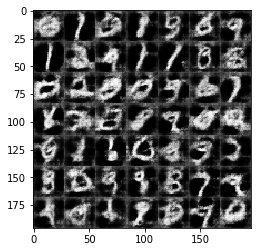

Epoch 2/2... Discriminator Loss: 1.0466... Generator Loss: 1.3868
Epoch 2/2... Discriminator Loss: 1.0684... Generator Loss: 0.9128
Epoch 2/2... Discriminator Loss: 0.9038... Generator Loss: 1.0893
Epoch 2/2... Discriminator Loss: 0.8351... Generator Loss: 1.3329
Epoch 2/2... Discriminator Loss: 1.1599... Generator Loss: 2.1320
Epoch 2/2... Discriminator Loss: 0.8874... Generator Loss: 1.2979
Epoch 2/2... Discriminator Loss: 0.8624... Generator Loss: 1.1819


In [22]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.8595... Generator Loss: 1.2639
Epoch 1/1... Discriminator Loss: 0.5731... Generator Loss: 2.0176
Epoch 1/1... Discriminator Loss: 0.4852... Generator Loss: 2.4729
Epoch 1/1... Discriminator Loss: 0.4415... Generator Loss: 2.8526
Epoch 1/1... Discriminator Loss: 0.6034... Generator Loss: 4.2080
Epoch 1/1... Discriminator Loss: 1.0619... Generator Loss: 1.0149
Epoch 1/1... Discriminator Loss: 0.9423... Generator Loss: 3.8944
Epoch 1/1... Discriminator Loss: 0.8010... Generator Loss: 1.3468
Epoch 1/1... Discriminator Loss: 1.4034... Generator Loss: 4.6024
Epoch 1/1... Discriminator Loss: 0.6881... Generator Loss: 1.9411


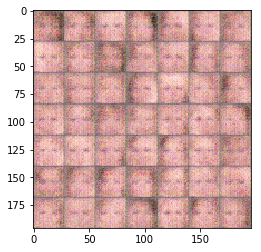

Epoch 1/1... Discriminator Loss: 0.8133... Generator Loss: 1.4138
Epoch 1/1... Discriminator Loss: 0.8083... Generator Loss: 1.3689
Epoch 1/1... Discriminator Loss: 0.7164... Generator Loss: 2.0475
Epoch 1/1... Discriminator Loss: 0.8939... Generator Loss: 1.7009
Epoch 1/1... Discriminator Loss: 1.3473... Generator Loss: 0.6189
Epoch 1/1... Discriminator Loss: 1.1868... Generator Loss: 0.7626
Epoch 1/1... Discriminator Loss: 1.3014... Generator Loss: 2.9113
Epoch 1/1... Discriminator Loss: 1.4200... Generator Loss: 0.5386
Epoch 1/1... Discriminator Loss: 1.4479... Generator Loss: 0.5070
Epoch 1/1... Discriminator Loss: 1.5483... Generator Loss: 0.4378


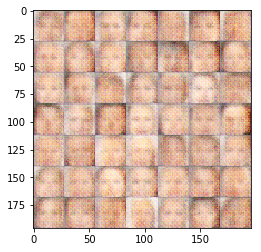

Epoch 1/1... Discriminator Loss: 1.1410... Generator Loss: 0.7979
Epoch 1/1... Discriminator Loss: 1.0348... Generator Loss: 1.3761
Epoch 1/1... Discriminator Loss: 1.5211... Generator Loss: 0.5206
Epoch 1/1... Discriminator Loss: 0.7176... Generator Loss: 1.4902
Epoch 1/1... Discriminator Loss: 0.8514... Generator Loss: 1.3863
Epoch 1/1... Discriminator Loss: 1.2160... Generator Loss: 4.8992
Epoch 1/1... Discriminator Loss: 1.0975... Generator Loss: 0.7478
Epoch 1/1... Discriminator Loss: 0.4774... Generator Loss: 3.2948
Epoch 1/1... Discriminator Loss: 0.5700... Generator Loss: 1.9750
Epoch 1/1... Discriminator Loss: 0.6658... Generator Loss: 1.9118


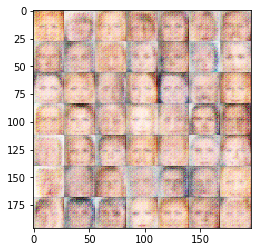

Epoch 1/1... Discriminator Loss: 0.7665... Generator Loss: 2.4425
Epoch 1/1... Discriminator Loss: 0.5157... Generator Loss: 2.3150
Epoch 1/1... Discriminator Loss: 0.5686... Generator Loss: 1.8967
Epoch 1/1... Discriminator Loss: 0.6280... Generator Loss: 2.4925
Epoch 1/1... Discriminator Loss: 0.6262... Generator Loss: 3.7532
Epoch 1/1... Discriminator Loss: 1.6683... Generator Loss: 0.3748
Epoch 1/1... Discriminator Loss: 0.4777... Generator Loss: 2.4932
Epoch 1/1... Discriminator Loss: 0.9437... Generator Loss: 0.9598
Epoch 1/1... Discriminator Loss: 2.3623... Generator Loss: 0.1968
Epoch 1/1... Discriminator Loss: 1.9186... Generator Loss: 0.2786


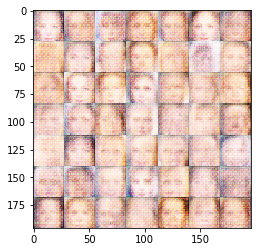

Epoch 1/1... Discriminator Loss: 0.6516... Generator Loss: 3.4512
Epoch 1/1... Discriminator Loss: 0.5999... Generator Loss: 1.6441
Epoch 1/1... Discriminator Loss: 0.5561... Generator Loss: 3.0993
Epoch 1/1... Discriminator Loss: 0.5664... Generator Loss: 1.9433
Epoch 1/1... Discriminator Loss: 0.6695... Generator Loss: 1.5678
Epoch 1/1... Discriminator Loss: 0.5939... Generator Loss: 7.7924
Epoch 1/1... Discriminator Loss: 1.0047... Generator Loss: 0.9685
Epoch 1/1... Discriminator Loss: 2.1837... Generator Loss: 0.2048
Epoch 1/1... Discriminator Loss: 0.5309... Generator Loss: 4.7298
Epoch 1/1... Discriminator Loss: 0.8553... Generator Loss: 1.8193


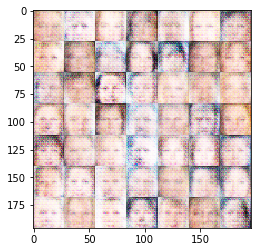

Epoch 1/1... Discriminator Loss: 1.0606... Generator Loss: 0.9080
Epoch 1/1... Discriminator Loss: 1.1363... Generator Loss: 2.9947
Epoch 1/1... Discriminator Loss: 0.5857... Generator Loss: 4.6068
Epoch 1/1... Discriminator Loss: 1.2508... Generator Loss: 9.2382
Epoch 1/1... Discriminator Loss: 1.1371... Generator Loss: 4.6801
Epoch 1/1... Discriminator Loss: 0.9138... Generator Loss: 0.9944
Epoch 1/1... Discriminator Loss: 0.4824... Generator Loss: 5.0762
Epoch 1/1... Discriminator Loss: 0.4960... Generator Loss: 4.2876
Epoch 1/1... Discriminator Loss: 0.6693... Generator Loss: 1.5703
Epoch 1/1... Discriminator Loss: 1.1978... Generator Loss: 5.2046


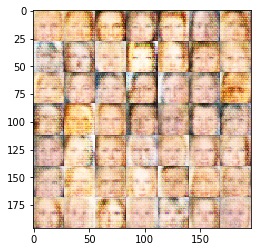

Epoch 1/1... Discriminator Loss: 0.4717... Generator Loss: 3.7960
Epoch 1/1... Discriminator Loss: 0.5807... Generator Loss: 3.5814
Epoch 1/1... Discriminator Loss: 0.4051... Generator Loss: 3.5285
Epoch 1/1... Discriminator Loss: 0.6132... Generator Loss: 1.5598
Epoch 1/1... Discriminator Loss: 1.3290... Generator Loss: 0.5382
Epoch 1/1... Discriminator Loss: 0.9874... Generator Loss: 0.8187
Epoch 1/1... Discriminator Loss: 1.3225... Generator Loss: 1.0848
Epoch 1/1... Discriminator Loss: 1.1611... Generator Loss: 7.8072
Epoch 1/1... Discriminator Loss: 0.7340... Generator Loss: 1.3847
Epoch 1/1... Discriminator Loss: 1.2968... Generator Loss: 5.7667


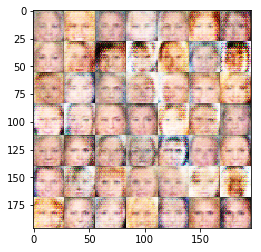

Epoch 1/1... Discriminator Loss: 0.7253... Generator Loss: 4.3958
Epoch 1/1... Discriminator Loss: 1.1066... Generator Loss: 3.9168
Epoch 1/1... Discriminator Loss: 0.4569... Generator Loss: 2.5177
Epoch 1/1... Discriminator Loss: 0.5243... Generator Loss: 5.4006
Epoch 1/1... Discriminator Loss: 0.3862... Generator Loss: 6.8041
Epoch 1/1... Discriminator Loss: 0.5051... Generator Loss: 4.1913
Epoch 1/1... Discriminator Loss: 0.6006... Generator Loss: 4.0842
Epoch 1/1... Discriminator Loss: 0.8224... Generator Loss: 1.1369
Epoch 1/1... Discriminator Loss: 1.1363... Generator Loss: 3.4479
Epoch 1/1... Discriminator Loss: 0.4514... Generator Loss: 3.9000


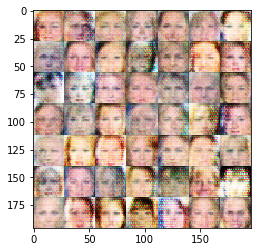

Epoch 1/1... Discriminator Loss: 0.9906... Generator Loss: 4.2842
Epoch 1/1... Discriminator Loss: 0.5820... Generator Loss: 1.8623
Epoch 1/1... Discriminator Loss: 0.4830... Generator Loss: 2.4352
Epoch 1/1... Discriminator Loss: 0.4954... Generator Loss: 3.7619
Epoch 1/1... Discriminator Loss: 0.4247... Generator Loss: 3.2541
Epoch 1/1... Discriminator Loss: 0.3695... Generator Loss: 4.4787
Epoch 1/1... Discriminator Loss: 1.2348... Generator Loss: 2.6283
Epoch 1/1... Discriminator Loss: 0.7947... Generator Loss: 1.2785
Epoch 1/1... Discriminator Loss: 0.5675... Generator Loss: 3.6692
Epoch 1/1... Discriminator Loss: 1.6811... Generator Loss: 0.3656


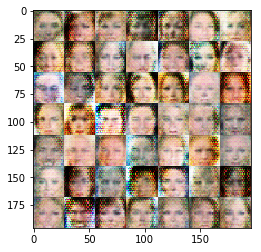

Epoch 1/1... Discriminator Loss: 0.5673... Generator Loss: 1.9885
Epoch 1/1... Discriminator Loss: 0.7529... Generator Loss: 1.2353
Epoch 1/1... Discriminator Loss: 1.0080... Generator Loss: 0.8874
Epoch 1/1... Discriminator Loss: 0.5401... Generator Loss: 3.0881
Epoch 1/1... Discriminator Loss: 0.9359... Generator Loss: 4.4051
Epoch 1/1... Discriminator Loss: 1.0766... Generator Loss: 2.7962
Epoch 1/1... Discriminator Loss: 0.5167... Generator Loss: 2.9735
Epoch 1/1... Discriminator Loss: 0.7814... Generator Loss: 1.1690
Epoch 1/1... Discriminator Loss: 0.5568... Generator Loss: 2.3746
Epoch 1/1... Discriminator Loss: 0.9726... Generator Loss: 0.9217


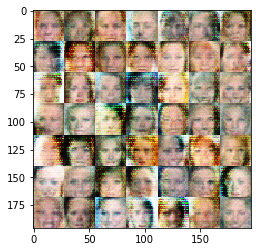

Epoch 1/1... Discriminator Loss: 0.5208... Generator Loss: 4.8162
Epoch 1/1... Discriminator Loss: 0.5278... Generator Loss: 2.4484
Epoch 1/1... Discriminator Loss: 0.4228... Generator Loss: 3.5013
Epoch 1/1... Discriminator Loss: 0.4643... Generator Loss: 3.9693
Epoch 1/1... Discriminator Loss: 0.4688... Generator Loss: 2.6613
Epoch 1/1... Discriminator Loss: 0.4333... Generator Loss: 4.0383
Epoch 1/1... Discriminator Loss: 0.5358... Generator Loss: 4.9506
Epoch 1/1... Discriminator Loss: 0.6831... Generator Loss: 1.6173
Epoch 1/1... Discriminator Loss: 0.8213... Generator Loss: 5.8377
Epoch 1/1... Discriminator Loss: 0.9994... Generator Loss: 0.8392


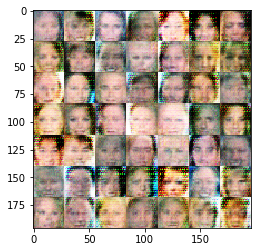

Epoch 1/1... Discriminator Loss: 0.7286... Generator Loss: 3.7673
Epoch 1/1... Discriminator Loss: 0.8738... Generator Loss: 3.4021
Epoch 1/1... Discriminator Loss: 0.6132... Generator Loss: 2.7254
Epoch 1/1... Discriminator Loss: 1.2836... Generator Loss: 1.4236
Epoch 1/1... Discriminator Loss: 0.6274... Generator Loss: 4.8778
Epoch 1/1... Discriminator Loss: 1.5318... Generator Loss: 6.5710
Epoch 1/1... Discriminator Loss: 0.5799... Generator Loss: 4.3372
Epoch 1/1... Discriminator Loss: 0.5231... Generator Loss: 2.3828
Epoch 1/1... Discriminator Loss: 0.4788... Generator Loss: 3.1348
Epoch 1/1... Discriminator Loss: 0.6848... Generator Loss: 1.4639


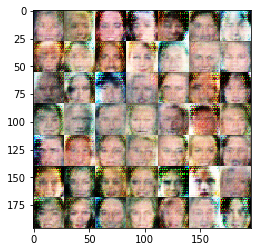

Epoch 1/1... Discriminator Loss: 0.6519... Generator Loss: 1.6309
Epoch 1/1... Discriminator Loss: 0.9310... Generator Loss: 5.1279
Epoch 1/1... Discriminator Loss: 0.6972... Generator Loss: 2.8784
Epoch 1/1... Discriminator Loss: 0.8933... Generator Loss: 0.9671
Epoch 1/1... Discriminator Loss: 0.3873... Generator Loss: 3.6017
Epoch 1/1... Discriminator Loss: 0.4643... Generator Loss: 3.5360
Epoch 1/1... Discriminator Loss: 1.1185... Generator Loss: 0.6885
Epoch 1/1... Discriminator Loss: 0.7493... Generator Loss: 1.2112
Epoch 1/1... Discriminator Loss: 0.3881... Generator Loss: 3.9095
Epoch 1/1... Discriminator Loss: 0.5744... Generator Loss: 1.9008


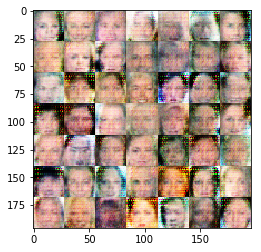

Epoch 1/1... Discriminator Loss: 1.3118... Generator Loss: 0.5380
Epoch 1/1... Discriminator Loss: 0.4352... Generator Loss: 3.8545
Epoch 1/1... Discriminator Loss: 0.5074... Generator Loss: 4.0264
Epoch 1/1... Discriminator Loss: 0.5008... Generator Loss: 5.6040
Epoch 1/1... Discriminator Loss: 1.1946... Generator Loss: 5.8697
Epoch 1/1... Discriminator Loss: 0.4612... Generator Loss: 4.6013
Epoch 1/1... Discriminator Loss: 0.7483... Generator Loss: 1.6486
Epoch 1/1... Discriminator Loss: 2.1668... Generator Loss: 0.2304
Epoch 1/1... Discriminator Loss: 0.4186... Generator Loss: 3.3155
Epoch 1/1... Discriminator Loss: 0.5230... Generator Loss: 3.1443


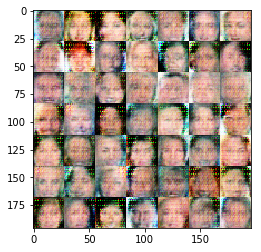

Epoch 1/1... Discriminator Loss: 0.5019... Generator Loss: 2.1663
Epoch 1/1... Discriminator Loss: 0.4776... Generator Loss: 4.8925
Epoch 1/1... Discriminator Loss: 0.5432... Generator Loss: 1.8952
Epoch 1/1... Discriminator Loss: 0.4352... Generator Loss: 2.7659
Epoch 1/1... Discriminator Loss: 0.8791... Generator Loss: 0.9935
Epoch 1/1... Discriminator Loss: 0.3743... Generator Loss: 4.0339
Epoch 1/1... Discriminator Loss: 1.6243... Generator Loss: 5.2404
Epoch 1/1... Discriminator Loss: 1.1353... Generator Loss: 6.0890
Epoch 1/1... Discriminator Loss: 0.5276... Generator Loss: 2.1122
Epoch 1/1... Discriminator Loss: 0.8637... Generator Loss: 1.0522


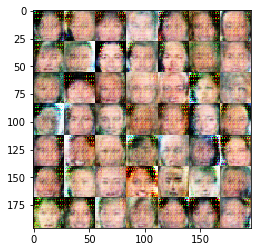

Epoch 1/1... Discriminator Loss: 0.4800... Generator Loss: 4.7697
Epoch 1/1... Discriminator Loss: 0.6759... Generator Loss: 1.3700
Epoch 1/1... Discriminator Loss: 0.4278... Generator Loss: 3.0043
Epoch 1/1... Discriminator Loss: 0.4804... Generator Loss: 2.4258
Epoch 1/1... Discriminator Loss: 0.6003... Generator Loss: 1.7123
Epoch 1/1... Discriminator Loss: 0.4190... Generator Loss: 2.9266
Epoch 1/1... Discriminator Loss: 0.5610... Generator Loss: 2.1376
Epoch 1/1... Discriminator Loss: 0.5232... Generator Loss: 2.0295


In [23]:
batch_size = 128
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.